# Wrangle and Analyze Data

### Introduction

<p>This project will utilize data provided by the WeRateDogs Twitter account. 
   I will first gather the data, then assess, clean and store the data. 
   Once these tasks are completed I will analyze and use visualizations to explain the analysis.
   

In [544]:
#importing tools
import pandas as pd
import numpy as np
import tweepy
import requests
import configparser
import json
import re
from timeit import default_timer as timer
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import seaborn as sns

In [545]:
#reading .csv file into variable: tac for
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [546]:
#Download the imgage predictions file using the Request library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url, allow_redirects=True)
response

<Response [200]>

In [547]:
#create predictions file and read predictions in

with open('image-predictions.tsv','wb') as file:
    file.write(response.content)
    
imgPredict = pd.read_csv('image-predictions.tsv', sep = '\t')
imgPredict.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [548]:
#twitter-api.py file from Udacity
#needed to follow this route as the Twitter API is no longer easily accessed


# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These will be hidden to comply with Twitter's API terms and conditions
key = "MtRL3X0vfEOTRjXqmCDrGwf9c"
secretkey = "JzbnpcWqozhRZ3kJzQaxLqOE1kn90dHc2Nf7PZuEjx3xJbNHQF"
token = "1666590931787677699-k7L5F486yYF0VDpfynrE33ZIcB3Oip"
secrettoken = "b7XhFGYKofN0kBiY5bfJdEiSQp0YaMIdJUzag4QTZO8JJ"

auth = tweepy.OAuthHandler(key, secretkey)
auth.set_access_token(token, secrettoken)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        e = tweet_id
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
 #           print("Success")
  #          json.dump(tweet._json, outfile)
   #         outfile.write('\n')
    #    except:
     #       #print("Fail")
      #      fails_dict[tweet_id] = e
       #     pass
#end = timer()
#print(end - start)
#print(fails_dict)


2356

In [549]:
#reading in the JSON data using code provided by Udacity
jsonurl = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
jsontxt = requests.get(jsonurl, allow_redirects=True)
jsontxt
jsonlist = []

with open('tweet-json.txt','wb') as file:
    file.write(jsontxt.content)

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        likes = tweet['favorite_count']
        retweets = tweet['retweet_count']
        jsonlist.append({'tweet_id':tweet_id, 'likes':likes, 'retweets':retweets})

jsonlist = pd.DataFrame(jsonlist, columns = ['tweet_id', 'likes', 'retweets'])
jsonlist.head(5)

,tweet_id,likes,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

    

#### Visual Assessments

In [550]:
#viewing the data held in the archive file
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [551]:
#viewing the data held in the image predictions file
imgPredict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [552]:
#viewing the data held in the image predictions file
imgPredict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [553]:
#viewing the data from the twitter api that was read into the json file
jsonlist

,tweet_id,likes,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


#### Programatic Assessments

In [554]:
#Programmatic assessment of the archive file will follow
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [555]:
archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [556]:
#taking a look at the reply status id, reply to user id and source columns
a = pd.DataFrame(archive, columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'source'])
a.head(5)

,in_reply_to_status_id,in_reply_to_user_id,source
0,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r..."
1,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r..."
2,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r..."
3,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r..."
4,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r..."


In [557]:
a.tail(5)

,in_reply_to_status_id,in_reply_to_user_id,source
2351,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r..."
2352,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r..."
2353,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r..."
2354,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r..."
2355,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r..."


In [558]:
archive['expanded_urls'].head()

0    https://twitter.com/dog_rates/status/892420643...
1    https://twitter.com/dog_rates/status/892177421...
2    https://twitter.com/dog_rates/status/891815181...
3    https://twitter.com/dog_rates/status/891689557...
4    https://twitter.com/dog_rates/status/891327558...
Name: expanded_urls, dtype: object

In [559]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [560]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [561]:
 #checks for names beginning with lower case, indicating invalid names
archive[archive.name.str.islower() == True].name.value_counts()

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
getting          2
actually         2
mad              2
not              2
old              1
life             1
officially       1
light            1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64

In [562]:
#viewing the data held in the image predictions file
imgPredict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [563]:
imgPredict.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [564]:
imgPredict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [565]:
#taking a look at what the predictions look like
prediction_img_df = pd.DataFrame(imgPredict, columns = ['p1', 'p2', 'p3'])
prediction_img_df.head(10)


,p1,p2,p3
0,Welsh_springer_spaniel,collie,Shetland_sheepdog
1,redbone,miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,malinois,bloodhound
3,Rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,Rottweiler,Doberman
5,Bernese_mountain_dog,English_springer,Greater_Swiss_Mountain_dog
6,box_turtle,mud_turtle,terrapin
7,chow,Tibetan_mastiff,fur_coat
8,shopping_cart,shopping_basket,golden_retriever
9,miniature_poodle,komondor,soft-coated_wheaten_terrier


In [566]:
#referenced: https://stackoverflow.com/questions/53550988/count-occurrences-of-false-or-true-in-a-column-in-pandas
img_df = pd.DataFrame(imgPredict)
num_p1_notdog = img_df.p1_dog.value_counts().loc[False]
num_p2_notdog = img_df.p2_dog.value_counts().loc[False]
num_p3_notdog = img_df.p3_dog.value_counts().loc[False]

print(num_p1_notdog, num_p2_notdog, num_p3_notdog)

543 522 576


In [567]:
#viewing the data from the twitter api that was read into the json file
jsonlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tweet_id  2354 non-null   int64
 1   likes     2354 non-null   int64
 2   retweets  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [568]:
jsonlist.head()

,tweet_id,likes,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


### Quality issues

##### Twitter Archive

>1. The timestamp and retweet timestamp columns are object datatype. They should be datetime.

>2. Some denominators are higher than 10. The rating system allows for higher that 10/10 but it is unclear if ratings with denominators higher than 10 are expected.Additionally, there are some extreme rating outliers.

>3. There are multiple names that are not valid.
    
>4. Several columns have mostly null values: 
    in_reply_to_status_id       78 non-null     float64
    in_reply_to_user_id         78 non-null     float64
    retweeted_status_id         181 non-null    float64
    retweeted_status_user_id    181 non-null    float64
    retweeted_status_timestamp  181 non-null    object 

>5. Source should have the HTML removed

>6. There are missing urls. There are only 2297 URLs when there are 2356 total entries.

##### Image Predictions File

>7. There are missing preditions. The twitter archive file has 2356 entries but there are only 2075 prediction entries. 

>8. The tweet_id should be a string

##### API File

>9. 2 missing entries. 2354 instead of 2356

>10. tweet_id should be string.

### Tidiness issues
>1. The doggo, floofer, pupper and puppo columns should be contained in one column and category.

>2. All of the files be merged to create one dataframe.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [569]:
# Make copies of original pieces of data
df_archive = pd.DataFrame(archive)
df_predict = pd.DataFrame(imgPredict)
df_api = pd.DataFrame(jsonlist)
df_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### Changing datatypes

##### Define: Some columns have datatypes that are incorrect. 
>For the columns with incorrect datatypes that will not be removed, I will be changing them.

#### Code

In [570]:
# Referenced https://stackoverflow.com/questions/33957720/how-to-convert-column-with-dtype-as-object-to-string-in-pandas-dataframe 
# changing tweet_id to string
df_archive.tweet_id = df_archive.tweet_id.astype('string')
df_predict.tweet_id = df_predict.tweet_id.astype('string')
df_api.tweet_id = df_api.tweet_id.astype('string')
df_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [571]:
#change timestame to datetime
df_archive['timestamp'] = pd.to_datetime(df_archive['timestamp'])

In [572]:
#change numerator to float with 2 decimal places
df_archive.rating_numerator = df_archive.rating_numerator.astype('float', 2)

In [573]:
#check the that the datatypes for tweet_id and timestamp are changed in the archive dataset
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   string             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   float64         

In [574]:
#check the that the tweet_id datatype is changed in the prediction dataset
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   string 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4), string(1)
memory usage: 152.1+ KB


In [575]:
#check the that the tweet_id datatype is changed in the api dataset
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2354 non-null   string
 1   likes     2354 non-null   int64 
 2   retweets  2354 non-null   int64 
dtypes: int64(2), string(1)
memory usage: 55.3 KB


### Some of the denominators are higher than 10
>The WeRateDogs scoring system is a N/10 system with N being a number. It is expected to see a numerator that is not 10 due to the nature of the scoring system, but not necessarily expected that the denominator is higher than 10. 

>I will convert the denominators to and associated numerators accordingly. Then the scores can be based on the numerator alone.

>Once all of the denominators are the same value (10), the numerator can be used as a measure if needed.

In [576]:
#Referenced: https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas

df_archive.loc[df_archive['rating_denominator'] > 10, ['rating_numerator']] = df_archive['rating_numerator']/(df_archive['rating_denominator']/10)
df_archive.loc[df_archive['rating_denominator'] > 10, ['rating_denominator']] = 10
df_archive.loc[df_archive['rating_denominator'] < 10, ['rating_numerator']] = df_archive['rating_numerator']*(10/df_archive['rating_denominator'])
df_archive.loc[df_archive['rating_denominator'] < 10, ['rating_denominator']] = 10

df_archive.rating_numerator.value_counts()

12.000000      562
11.000000      469
10.000000      463
13.000000      351
9.000000       157
8.000000       102
14.000000       54
7.000000        54
5.000000        38
6.000000        32
3.000000        19
4.000000        15
2.000000        11
1.000000         8
0.000000         2
75.000000        2
15.000000        2
420.000000       2
8.181818         2
1776.000000      1
6.363636         1
12.500000        1
7.333333         1
27.000000        1
34.285714        1
inf              1
182.000000       1
666.000000       1
17.000000        1
26.000000        1
Name: rating_numerator, dtype: int64

### There are dogs with invalid names
>The names that are invalid should be changed to "No Name".

In [638]:
# importing invalid names into a list
# referenced: https://docs.python.org/3/library/re.html 

invalid_names = []
df2_archive = df_archive

for i in df2_archive['name']:
    if str(i).islower():
        invalid_names.append(i)
        
#replacing the invalid names
df2_archive.name.replace(invalid_names, 'No Name', inplace=True)

df2_archive[df2_archive.name.str.islower() == True].name.value_counts()

Series([], Name: name, dtype: int64)

### Some columns have are mostly null
>The following columns have mostly null values:

>in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

>I need to know which rows contain data that is not null for tweets and retweets. Since we only want the ratings that are linked to original tweets and not retweets or replies, I will drop those rows. Then I will drop the columns since they will no longer be relevant. 

In [639]:
#deleting rows containing "not null" data for the retweets and replies
#referenced: https://www.geeksforgeeks.org/python-pandas-isnull-and-notnull/
#creating a copy first
df3_archive = df2_archive.copy() 

#using in_reply_to_status_id and retweeted_status_id to check for non-null values
for i, value in df3_archive.iterrows():
    if not pd.isnull(value['retweeted_status_id']):
        df3_archive.drop(i, inplace=True)

    if not pd.isnull(value['in_reply_to_status_id']):
        df3_archive.drop(i, inplace=True)
        
df3_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   string             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   float64         

In [640]:
#dropping columns related to retweets and replies now that all rows with data associated with them have been removed
#referenced: https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe

df3_archive.drop(['in_reply_to_status_id'], inplace=True, axis=1, errors='ignore')
df3_archive.drop(['in_reply_to_user_id'], inplace=True, axis=1, errors='ignore')
df3_archive.drop(['retweeted_status_id'], inplace=True, axis=1, errors='ignore')
df3_archive.drop(['retweeted_status_user_id'], inplace=True, axis=1, errors='ignore')
df3_archive.drop(['retweeted_status_timestamp'], inplace=True, axis=1, errors='ignore')

df3_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   string             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   float64            
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), float64

### HTML in the Source column 

>The HTML is unnecessary and makes things messier. Removing the HTML will make things easier to see if we want to analyze where the tweets originate from.

In [641]:
#referenced: https://stackoverflow.com/questions/45999415/removing-html-tags-in-pandas
#removing the HTML using str.replace

df3_archive['source'] = df3_archive['source'].str.replace(r'<[^<>]*>', '', regex=True)

df3_archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None


### Missing values in the URL column

>These are not useful for our analysis so even though there are missing values, it doesn't matter.
>This will be dropped

In [642]:
#using the same method as above to remove the column
df3_archive.drop(['expanded_urls'], inplace=True, axis=1, errors='ignore')

df3_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   string             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   float64            
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   doggo               2097 non-null   object             
 8   floofer             2097 non-null   object             
 9   pupper              2097 non-null   object             
 10  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(7), string(1)
memory usage: 196.6+ KB


### Merging Columns
> To clean things up, The doggo, floofer, pupper, and puppo items should be merged into one column and then dropped.




In [643]:
#referenced: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html

df3_archive['label'] = df3_archive.text.str.extract('(puppo|pupper|floofer|doggo)', expand=True)
df3_archive[df3_archive['label'].notnull()].sample(10)                        


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,label
1945,673707060090052608,2015-12-07 03:34:14+00:00,Twitter for iPhone,This is Raymond. He's absolutely terrified of ...,10.0,10,Raymond,None,None,pupper,None,pupper
1571,687704180304273409,2016-01-14 18:33:48+00:00,Twitter for iPhone,Say hello to Blakely. He thinks that's a hat. ...,9.0,10,Blakely,None,None,pupper,None,pupper
839,767191397493538821,2016-08-21 02:47:37+00:00,Twitter for iPhone,I don't know any of the backstory behind this ...,13.0,10,None,doggo,None,None,None,doggo
1357,703407252292673536,2016-02-27 02:32:12+00:00,Twitter for iPhone,This pupper doesn't understand gates. 10/10 so...,10.0,10,None,None,None,pupper,None,pupper
1552,688916208532455424,2016-01-18 02:49:58+00:00,Twitter for iPhone,This pupper just wants to say hello. 11/10 wou...,11.0,10,None,None,None,pupper,None,pupper
1579,687312378585812992,2016-01-13 16:36:55+00:00,Twitter for iPhone,"""You got any games on your phone"" 7/10 for inv...",7.0,10,None,None,None,pupper,None,pupper
1921,674262580978937856,2015-12-08 16:21:41+00:00,Twitter for iPhone,This is Gus. He's super stoked about being an ...,9.0,10,Gus,None,None,pupper,None,pupper
1683,681694085539872773,2015-12-29 04:31:49+00:00,Twitter for iPhone,This is Bo. He's a Benedoop Cumbersnatch. Seem...,11.0,10,Bo,None,None,pupper,None,pupper
489,813910438903693312,2016-12-28 00:52:25+00:00,Twitter for iPhone,This is Chubbs. He dug a hole and now he's stu...,11.0,10,Chubbs,doggo,None,None,None,doggo
1120,731156023742988288,2016-05-13 16:15:54+00:00,Twitter for iPhone,Say hello to this unbelievably well behaved sq...,12.0,10,No Name,None,None,None,None,doggo


In [644]:
#now the unnecessary columns of doggo, floofer, pupper and puppo can be dropped
df3_archive.drop(['doggo'], inplace=True, axis=1, errors='ignore')
df3_archive.drop(['floofer'], inplace=True, axis=1, errors='ignore')
df3_archive.drop(['pupper'], inplace=True, axis=1, errors='ignore')
df3_archive.drop(['puppo'], inplace=True, axis=1, errors='ignore')

df3_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   string             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   float64            
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   label               353 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(4), string(1)
memory usage: 147.4+ KB


### Merging DataFrames

> Merging the dataframes will put the appropriate information all in one spot, and we can determine if there is further cleaning that needs to be done more easily.

In [645]:
#creating another copy before making the merges
df4_archive = df3_archive
df2_pred = df_predict
df2_api = df_api

#creating new datafiles to become an interin dataframe and the final merged dataframe
#using an inner join will also take care of the yet unaddressed issue with the missing predictions

df_m = pd.merge(df4_archive, df2_pred, on = 'tweet_id', how = 'inner') 
df_main = pd.merge(df_m, df2_api, on = 'tweet_id', how = 'inner')


#fingers crossed, check the new dataframe
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   string             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   rating_numerator    1971 non-null   float64            
 5   rating_denominator  1971 non-null   int64              
 6   name                1971 non-null   object             
 7   label               322 non-null    object             
 8   jpg_url             1971 non-null   object             
 9   img_num             1971 non-null   int64              
 10  p1                  1971 non-null   object             
 11  p1_conf             1971 non-null   float64            
 12  p1_dog              1971 non-null 

In [646]:
print(df_main['label'])

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1966    NaN
1967    NaN
1968    NaN
1969    NaN
1970    NaN
Name: label, Length: 1971, dtype: object


## Storing Data
<p>
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".</p>

In [647]:
#storing the data
df_main.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. 

In [648]:
#summary of data
df_main.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,likes,retweets
count,1971.000000,1971.0,1971.000000,1971.000000,1.971000e+03,1.971000e+03,1971.000000,1971.000000
mean,11.694993,10.0,1.201928,0.594558,1.345850e-01,6.016556e-02,8949.106545,2784.449518
std,40.906341,0.0,0.559020,0.272126,1.010527e-01,5.094156e-02,12267.799790,4697.662893
min,0.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,81.000000,16.000000
25%,10.000000,10.0,1.000000,0.363091,5.339800e-02,1.608055e-02,1997.000000,628.500000
50%,11.000000,10.0,1.000000,0.587764,1.173970e-01,4.944380e-02,4147.000000,1367.000000
75%,12.000000,10.0,1.000000,0.847827,1.955655e-01,9.153815e-02,11402.500000,3239.000000
max,1776.000000,10.0,4.000000,1.000000,4.880140e-01,2.734190e-01,132810.000000,79515.000000


### Insight 1
<p>What are the top five dog names? <\p>

In [649]:
df_main.name.value_counts()


None          524
No Name        98
Charlie        11
Lucy           10
Cooper         10
             ... 
Cora            1
Huxley          1
Bookstore       1
Jersey          1
Christoper      1
Name: name, Length: 914, dtype: int64

###### obviously the name of no name will be left out in this analysis
###### Charlie is the most popular name with 11

### Insight 2

Which source has the most tweets?


In [609]:
df_main.source.value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

###### By far, iPhones are the most common source for tweets. 



### Insight 3

Are there a lot of non-dog predictions? Are they more prevalent in the third prediction than the first as one would expect?

In [610]:
# Checking for predictions that are not dogs in the p(n)_dog 
# Referenced: https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
notdog1=df_main.p1_dog.value_counts(normalize=True).mul(100)[False]
notdog2=df_main.p2_dog.value_counts(normalize=True).mul(100)[False]
notdog3=df_main.p3_dog.value_counts(normalize=True).mul(100)[False]

#comparing the values
notdogvals = [notdog1, notdog2, notdog3]
notdogvals

[25.773718924403855, 24.911212582445458, 27.397260273972602]

###### It appears that the last set of predictions presents more non-dog values than the first predictions, however, the second set of predictions produce less non-dog values than both of the others.

### Insight 4
Which dog names get the most retweets? What about the label?

###### It looks like dogs with the name of Bo has the most retweets, followed by Stephan and Duddles

In [616]:
#checking to see which dog names get more retweets
#referenced: https://stackoverflow.com/questions/55422979/pandas-equivalent-of-excel-countifs
df_main.groupby('name')['retweets'].sum().sort_values(ascending=False)


name
None          1566799
No Name        206320
Bo              73800
Stephan         56625
Duddles         45849
               ...   
Fwed               60
Keet               57
Christoper         51
Bloo               45
Kallie             45
Name: retweets, Length: 914, dtype: int64

In [ ]:
#it looks like we have two columns that have non-name values
#for our visualization I'd like to change that 



In [612]:
df_main.groupby('label')['retweets'].sum().sort_values(ascending=False)

label
pupper     512173
doggo      425611
puppo      189760
floofer     25587
Name: retweets, dtype: int64

###### Pupper is the most abundant label

## Visualizations

The most interesting revelations for me are the retweets for dog labels and names.
I would like to see what this looks like.

Text(0, 0.5, 'Number of Retweets')

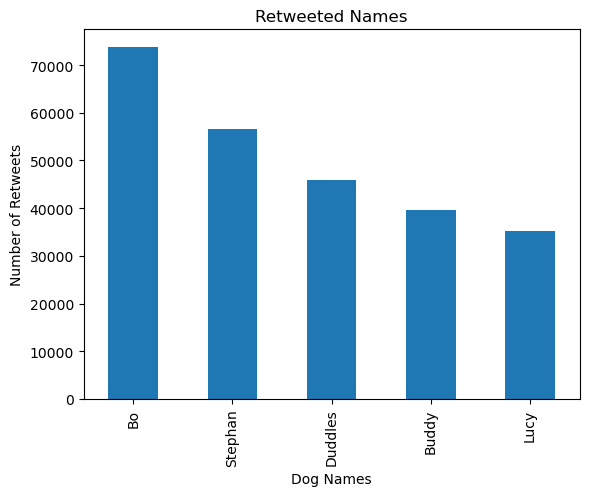

In [659]:
#I want to plot the names, but will not include the No Name and None columns
name_retweets = {}
name_retweets = df_main.groupby('name')['retweets'].sum().sort_values(ascending=False).nlargest(7)
name_retweets.pop('None')
name_retweets.pop('No Name')


name_retweets.plot(kind='bar', title='Retweeted Names')
plt.xlabel('Dog Names')
plt.ylabel('Number of Retweets')



Text(0, 0.5, 'Number of Retweets')

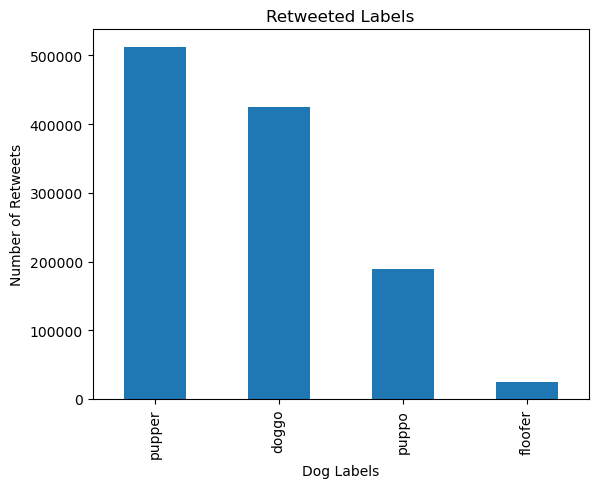

In [660]:
#I want to plot the names, but will not include the No Name and None columns
dog_label = {}
dog_label = df_main.groupby('label')['retweets'].sum().sort_values(ascending=False)

dog_label.plot(kind='bar', title='Retweeted Labels')
plt.xlabel('Dog Labels')
plt.ylabel('Number of Retweets')